In [2]:
import pandas as pd
A = pd.read_csv("F:/DS Notes/DS_Course_Lectures/DS1_Course_Lectures/Notes/Data sets/iris.csv")

In [3]:
A = A.drop(labels="Unnamed: 0",axis=1)

In [4]:
A.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [5]:
A.Species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

In [6]:
A = A.rename(columns={"Petal.Length": "PL", "Sepal.Length": "SL","Sepal.Width":"SW","Petal.Width":"PW"})

# EDA

In [18]:
def ANOVA(CON,CAT,DF):
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = CON+" "+"~"+" "+CAT
    model = ols(rel,DF).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = pd.DataFrame(anova_results)
    a = Q['PR(>F)'][CAT]
    print("%.40f"%a)      

In [19]:
ANOVA("PL","Species",A)

0.0000000000000000000000000000000000000000


In [20]:
ANOVA("PW","Species",A)

0.0000000000000000000000000000000000000000


In [21]:
ANOVA("SL","Species",A)

0.0000000000000000000000000000001669669191


In [22]:
ANOVA("SW","Species",A)

0.0000000000000000449201713330856452531324


In [23]:
from seaborn import boxplot

C:\Users\HP\Anacon -3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='PL'>

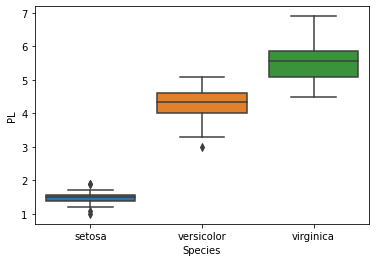

In [24]:
boxplot(A.Species,A['PL'])

C:\Users\HP\Anacon -3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


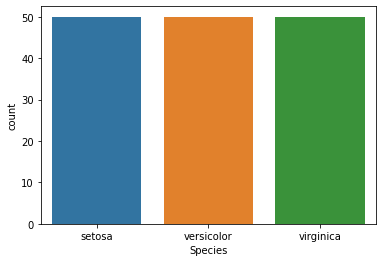

C:\Users\HP\Anacon -3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


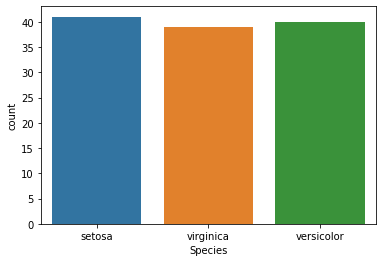

In [25]:
Y = A[["Species"]]
X = A[["PL","PW","SL","SW"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=11)

from seaborn import countplot
import matplotlib.pyplot as plt
countplot(Y.Species)
plt.show()
countplot(ytrain.Species)
plt.show()

In [26]:
Y.Species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

In [27]:
ytrain.Species.value_counts()

setosa        41
versicolor    40
virginica     39
Name: Species, dtype: int64

# Training & Testing the Model : Logistic Regression _ Metrics

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

C:\Users\HP\Anacon -3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9333333333333333

In [31]:
Y = A[["Species"]]
X = A[["PL","PW","SW"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=11)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ytest,pred)

C:\Users\HP\Anacon -3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9333333333333333

In [32]:
confusion_matrix(ytest,pred)

array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  9]], dtype=int64)